# Estimator in Extreme Value Theory

This notebook calculates Extreme Value Estimators based on 100m Data from 2008 to 2020 achieved by Women or Men depending on your choice of gender. The following estimator are calculated:

- Moment Estimator
- Hill Estimator
- Pickands Estimator


## Data Preparation

In [21]:
import pandas as pd
from numpy import log
import matplotlib.pyplot as plt
import numpy as np

In [43]:
gender = "men"
#gender = "women"
df = pd.read_csv(f"data/csv-files/100m_{gender}_filtered.csv")
df.head()

,Mark,WIND,Competitor,Nat,Venue,Date,Speed
0,9.5800,0.9,Usain BOLT,JAM,"Olympiastadion, Berlin (GER)",2009-08-16,37.578288
1,9.6875,-0.1,Yohan BLAKE,JAM,"Stade Olympique de la Pontaise, Lausanne (SUI)",2012-08-23,37.161290
2,9.6925,2.0,Tyson GAY,USA,Shanghai (CHN),2009-09-20,37.142120
3,9.7000,0.0,Michael HERRERA,CUB,La Habana (CUB),2010-03-19,37.113402
4,9.7200,0.2,Asafa POWELL,JAM,"Stade Olympique de la Pontaise, Lausanne (SUI)",2008-09-02,37.037037


In [44]:
# get the personal bests of all competitors over the years and sort them from lowest to largest
personal_bests = df.Speed.sort_values().to_numpy()

# statistical sample set
X = personal_bests
n = len(X)

## Moment Estimator

In [45]:
def m_n(r: int, k: int, X: np.array) -> float:
    """Calculates result of helper functions of the moment estimator"""
    return 1/(k) * sum([(log(X[(n-1)-i]) - log(X[(n-1)-k]))**r for i in range(0, k)])
                      

def moment_estimator(k: int, X: np.array) -> float:
    """Returns result of the moment estimator"""
    return m_n(1, k, X) + 1 - 1/2*(1- (m_n(1, k, X)**2)/m_n(2, k, X))**(-1)

In [46]:
# calculate all estimator for all k from 2, n-1
moment_estimators = [moment_estimator(k, X) for k in range(2, n)]

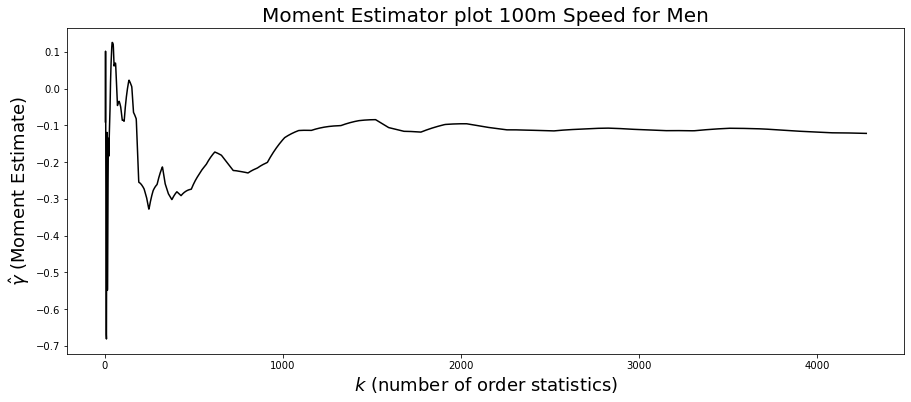

In [47]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), moment_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Moment Estimate)", fontsize=18)
plt.title(f"Moment Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Moment_Estimator_{gender.title()}")
plt.show()

## Hill Estimator

The Hill Estimator is not suitable for a negative estimator. We will first show the result for the normal Hill Estimator.

In [48]:
def hill_estimator(k: int, X: np.array) -> float:
    """Calculates the hill estimator for a given sample size k"""
    return 1/k * sum([log(X[(n-1)-i]) - log(X[(n-1)-k]) for i in range(0, k)])

In [49]:
hill_estimators = [hill_estimator(k, X) for k in range(2, n)]

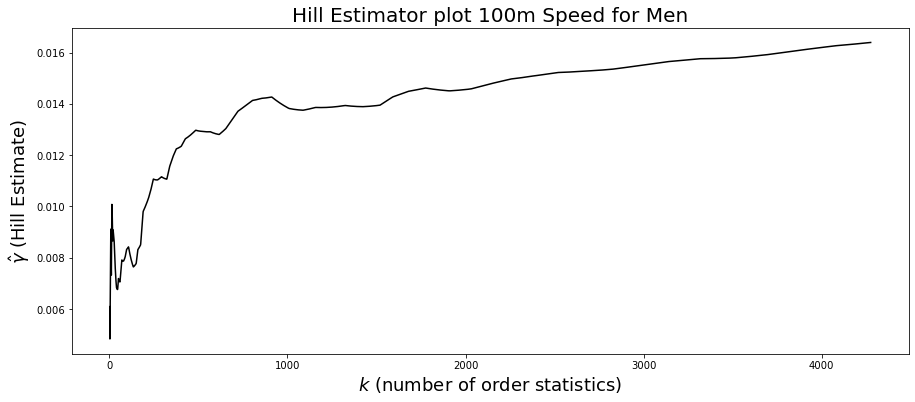

In [50]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), hill_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Hill Estimate)", fontsize=18)
plt.title(f"Hill Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Hill_Estimator_{gender.title()}")
plt.show()

### The Negative Hill Estimator

As a second approach we will use the Negative Hill Estimator that is suitable for $\gamma > -\dfrac{1}{2}$.

In [51]:
def neg_hill_estimator(k: int, X: np.array) -> float:
    return 1/k * sum([log(X[(n-1)]-X[(n-1)-i])-log(X[(n-1)]-X[(n-1)-k]) for i in range(1, k)])

In [52]:
neg_hill_estimators = [neg_hill_estimator(k, X) for k in range(2, n)]

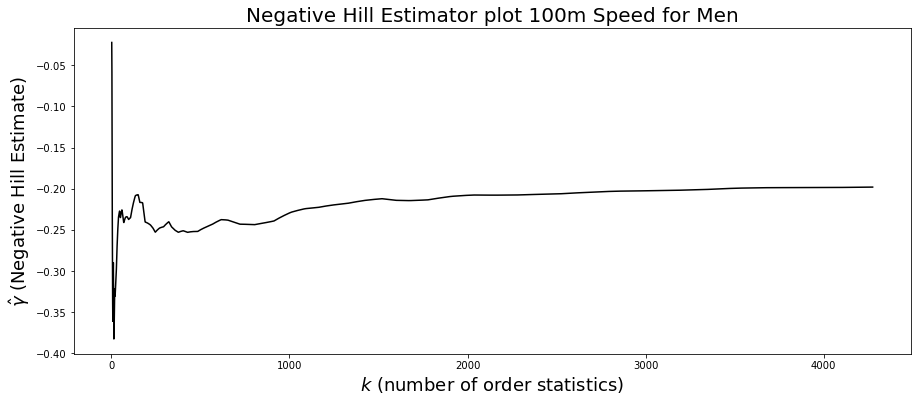

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2, n), neg_hill_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Negative Hill Estimate)", fontsize=18)
plt.title(f"Negative Hill Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Negative_Hill_Estimator_{gender.title()}")
plt.show()

## The Pickands Estimator

In [54]:
def pickands_estimator(k: int, X: np.array) -> float:
    """Calculates the Pickands Estimator for a given sample size k"""
    return 1/log(2) * log((X[(n-1)-k]-X[(n-1)-2*k])/(X[(n-1)-2*k]-X[(n-1)-4*k]))

In [55]:
pickands_estimators = [pickands_estimator(k, X) for k in range(1, int(n/4))]

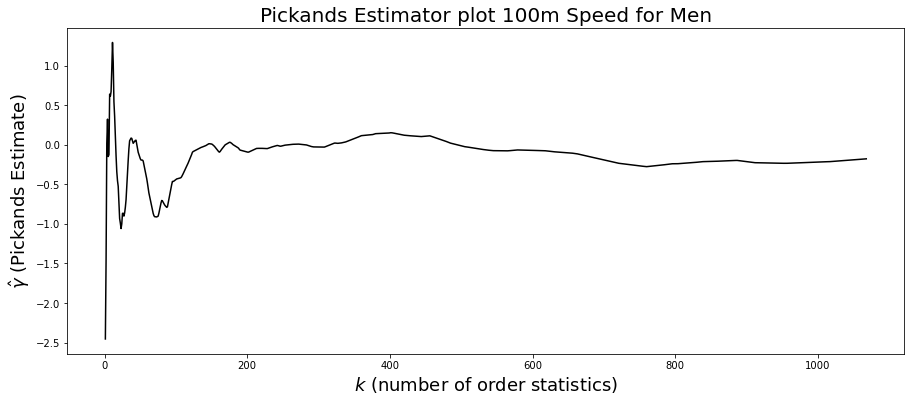

In [56]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1,int(n/4)), pickands_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Pickands Estimate)", fontsize=18)
plt.title(f"Pickands Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Pickands_Estimator_{gender.title()}")
plt.show()

## Combined Plot of Estimator

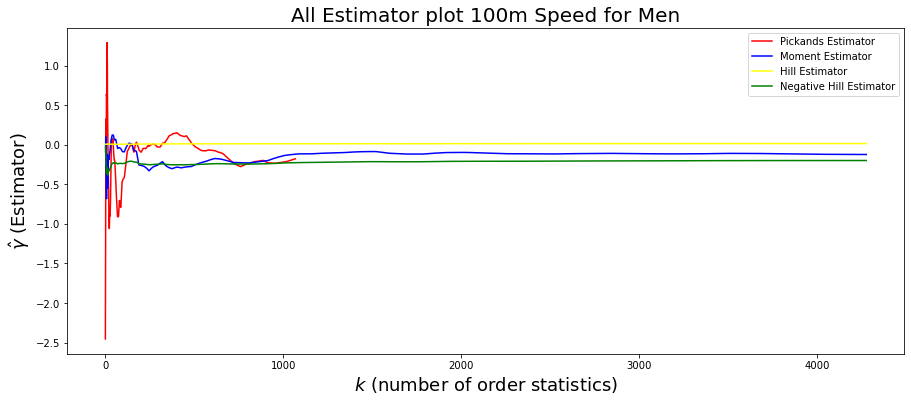

In [57]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1,int(n/4)), pickands_estimators, 'red', label="Pickands Estimator")
plt.plot(np.arange(2,n), moment_estimators, 'blue', label="Moment Estimator")
plt.plot(np.arange(2,n), hill_estimators, 'yellow', label="Hill Estimator")
plt.plot(np.arange(2, n), neg_hill_estimators, 'green', label="Negative Hill Estimator")
plt.legend(loc="best")
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Estimator)", fontsize=18)
plt.title(f"All Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/All_Estimator_{gender.title()}")
plt.show()